In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [170]:
path = '/Users/rich/Desktop/Python/gpa_calculator/成績單.xlsx'
df = pd.read_excel(path, header = 1, sheet_name='OverAll')
df

,課程名稱,Unnamed: 1,學期,學分,成績
0,NaN,NaN,一上,NaN,NaN
1,操行成績,NaN,NaN,0.0,84
2,體育,NaN,NaN,0.0,62
3,微積分（一）,NaN,NaN,4.0,60
4,普通物理實驗,NaN,NaN,1.0,83
...,...,...,...,...,...
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN


In [171]:
#確認一下是否都空
df['Unnamed: 1'].count()
df = df.drop(columns=['Unnamed: 1'])


In [172]:
df = df.drop(columns = ['學期'])

In [173]:
#進行資料清洗
df['學分'].fillna(0,inplace=True)
學分cond = df['學分'] == 0
df = df.drop(index = df[學分cond].index)
df['成績'].replace('棄修','不列入計算',inplace=True)
成績condiction = df['成績'] == '不列入計算'
df = df.drop(index=df[成績condiction].index)
df.reset_index(drop=True,inplace=True)
df

,課程名稱,學分,成績
0,微積分（一）,4.0,60
1,普通物理實驗,1.0,83
2,國文,2.0,62
3,外文：英文,2.0,63
4,語實：語言實習,1.0,62
5,普通物理學（一）,3.0,60
6,社會通識：中國大陸研究導論,2.0,94
7,微積分（二）,4.0,76
8,基礎科學概論,2.0,62
9,國文,2.0,66


In [174]:
#轉換標準https://www.scholaro.com/gpa-calculator/ (50 minimum pass)
#用numpy select()
conditions=[
    (df['成績']>=80),
    (df['成績']>= 70),
    (df['成績']>=60),
    (df['成績']>=50),
    (df['成績']<50)]
等地=['4','3','2','1', '0'] 
df['等地'] = np.select(conditions, 等地)

In [175]:
#計算gpa
學分總和= df['學分'].sum()
#使用.astype()轉成float
等地總積分 = (df['學分'].astype(float)*df['等地'].astype(float)).sum()
print('等地總積分 =',等地總積分)
print('學分總和 =',學分總和)
overall_gpa = 等地總積分/學分總和
overall_gpa = round(overall_gpa,2)
print('Overall GPA =', overall_gpa)

等地總積分 = 259.0
學分總和 = 98.0
Overall GPA = 2.64


In [176]:
dfmajor = pd.read_excel(path, header = 1, sheet_name='Major')
dfmajor.drop(columns=['Unnamed: 1'],inplace=True)
dfmajor.dropna(subset=['學分'], axis = 0, inplace=True)
dfmajor.reset_index(drop=True,inplace=True)


In [177]:
conditions=[
    (dfmajor['成績']>=80),
    (dfmajor['成績']>= 70),
    (dfmajor['成績']>=60),
    (dfmajor['成績']>=50),
    (dfmajor['成績']<50)]

In [178]:
dfmajor['等地'] = dfmajor['成績']+1
dfmajor['等地'] = np.select(conditions, 等地)

In [179]:
major_gpa = (dfmajor['等地'].astype(float)*dfmajor['學分']).sum() / dfmajor['學分'].sum()
major_gpa = round(major_gpa,2)
print('Major GPA =', major_gpa)

Major GPA = 2.46


In [180]:
#抵免成功學分數:38
#兩所學校總修學分數為:128+文化抵免失敗學分數
文化抵免失敗學分數=df['學分'][0:23].sum()-38
畢業總修學分=128+文化抵免失敗學分數
#重設index
df.reset_index(drop=True,inplace=True)

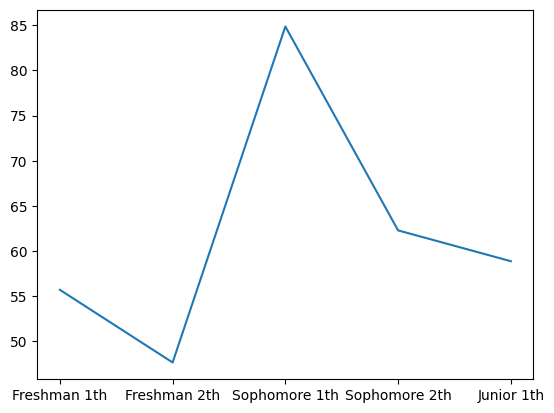

In [182]:
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties as font


#資料視覺化
一上 = round(df[0:6]['成績'].sum()/ 7,2)
一下 = round(df[7:14]['成績'].sum()/ 9,2)
二上 = round(df[15:22]['成績'].sum()/ 7,2)
二下 = round(df[23:29]['成績'].sum()/ 7,2)
三上 = round(df[30:37]['成績'].sum()/ 8,2)

x=['Freshman 1th','Freshman 2th','Sophomore 1th','Sophomore 2th','Junior 1th']
y=[一上,一下,二上,二下,三上]
plt.plot(x, y)

plt.show()
